## Prashant Mishra(231110036)
## ML Assignment 2
## Problem-5-part-2

### Loading dataset

In [1]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("data/kmeans_data.txt",delimiter=None)
print(data.shape)

(1012, 2)


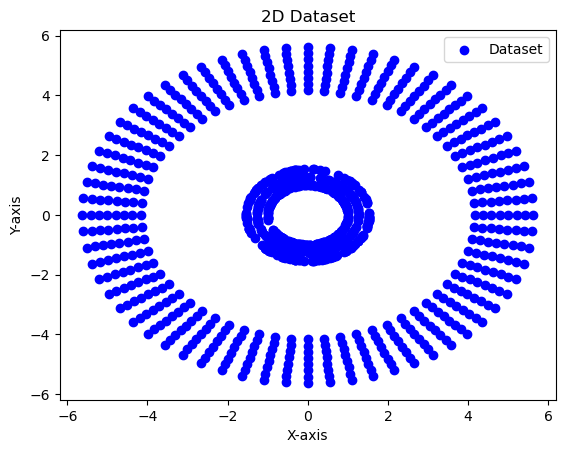

In [2]:
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Dataset')
plt.legend()
plt.show()

In [3]:
def k_means(data,K,num_iter=100):
    # it is given in assignment to choose first k(i.e.- 2) points as initial cluster m
    centroids = data[:K, :]
#     print(centroids)
    for i in range(num_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1)

        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=1)

        # Update the centroids as the mean of all data points assigned to them
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

### Part1   => Clustering Using Hand-crafted Features:

transformed data points are: [[-0.65224338 -0.75800961  1.        ]
 [ 3.8584055   2.0623607   4.37499996]
 [-1.6328513   5.3827894   5.62500001]
 [-4.7685935   0.46966546  4.79166668]
 [-5.3827894   1.6328513   5.62500001]]


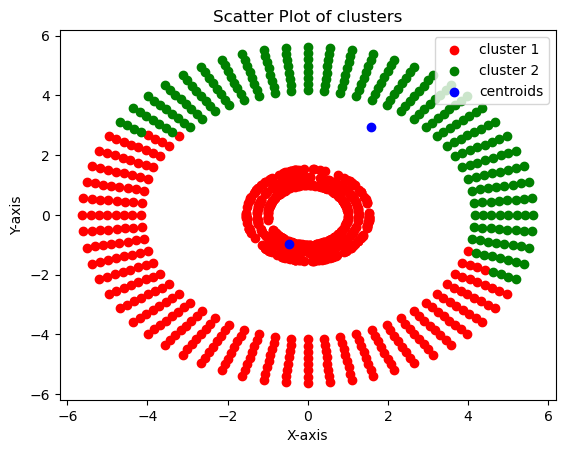

In [4]:
# Map data to proposed feature map -

transformed_data = np.array([np.insert(point,2, np.sqrt(point[0]**2+point[1]**2)) for point in data])


# transformed_data = np.array([np.insert(point, 3, 2*(point[0]**1/2)*((point[1])**1/2)) for point in data])
print("transformed data points are:" ,transformed_data[:5,:])

# calling KNN and plotting clusters
centroid, labels = k_means(transformed_data, 2, 200)
cluster_1 = data[labels == 0]
cluster_2 = data[labels == 1]

# Plot the points with different colors for each label
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='green', label='cluster 2')
plt.scatter(centroid[:, 0], centroid[:, 1], c='blue', label='centroids')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of clusters')
plt.legend()

# Show the plot
plt.show()

###  Part 2 => Clustering Using RBF Kernel with One landmark point choosen randomly:

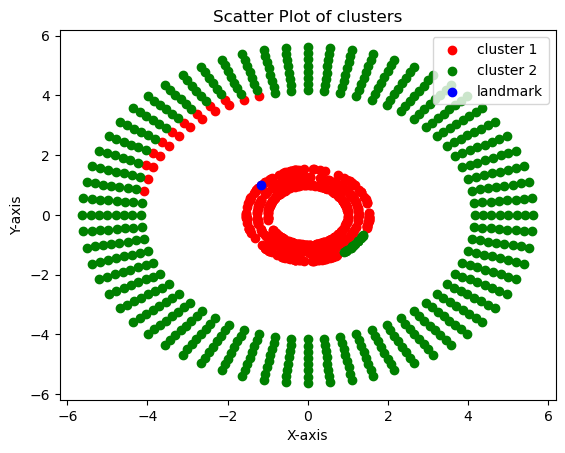

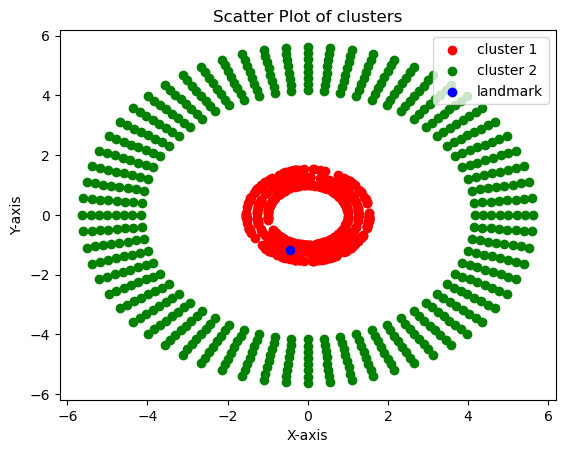

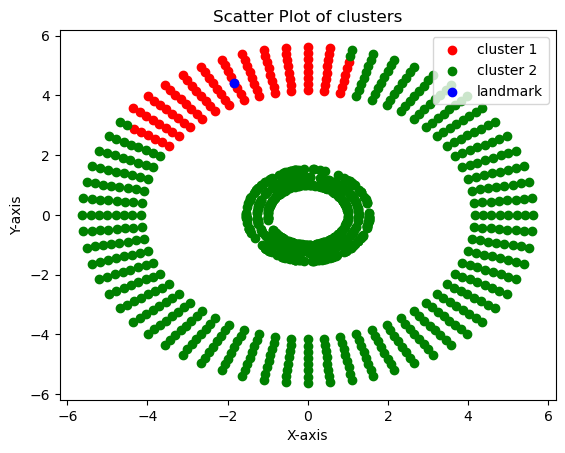

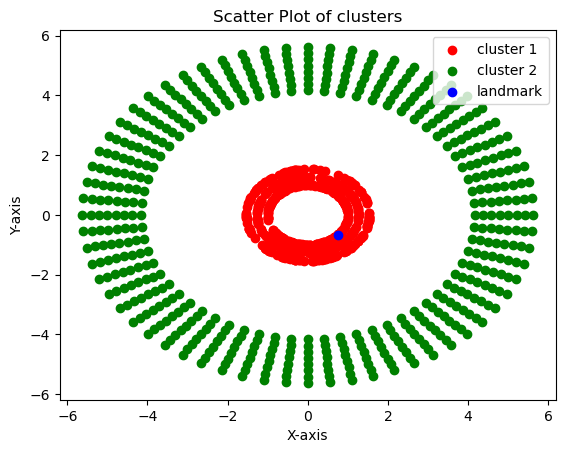

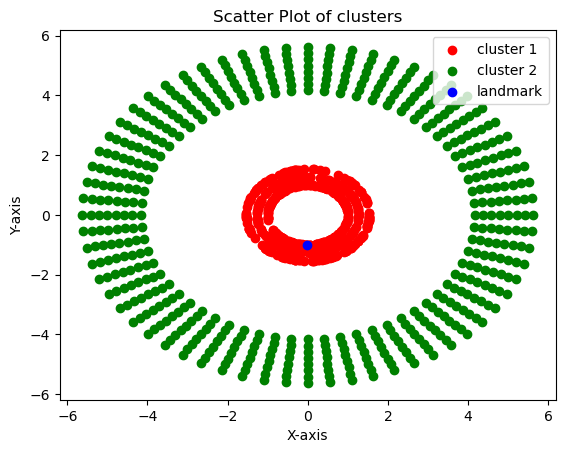

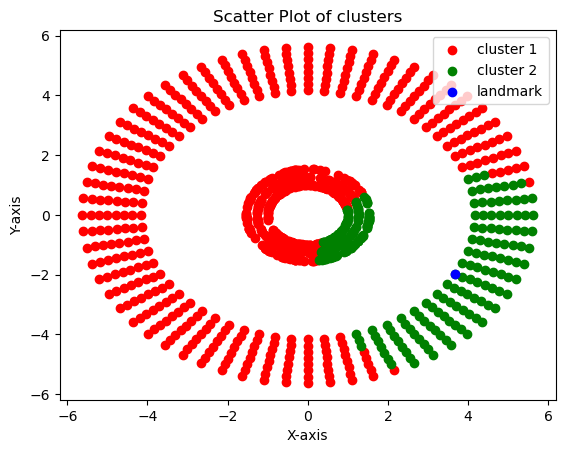

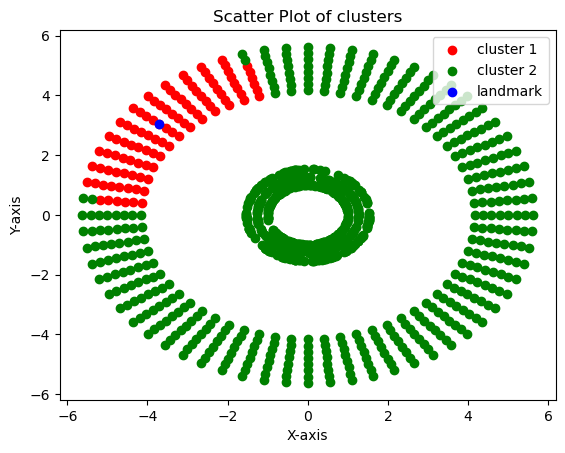

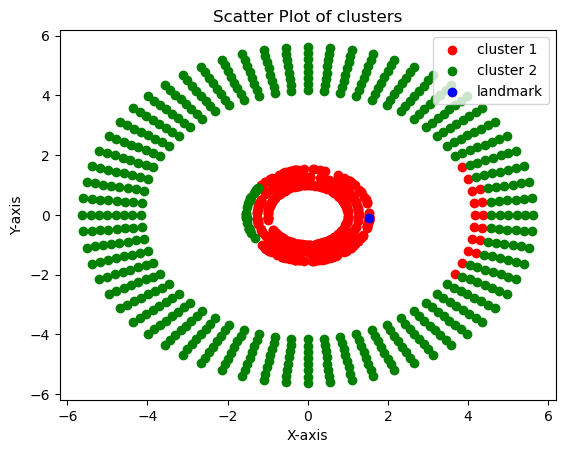

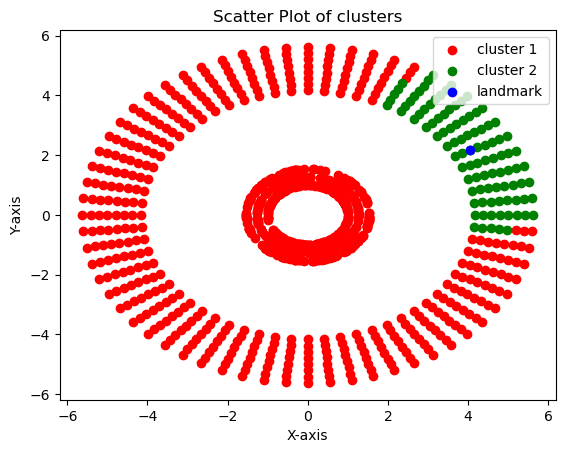

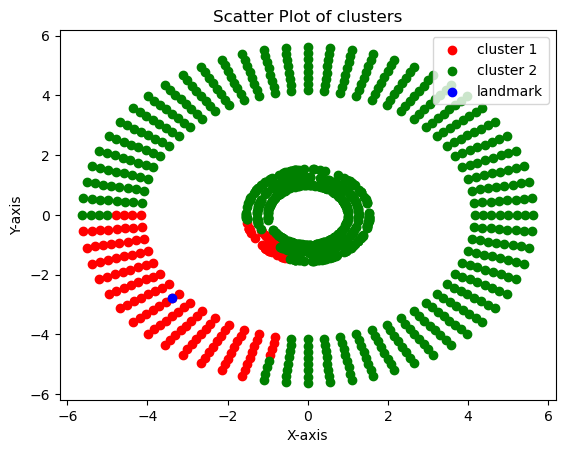

In [6]:
# function for gaussian kernal
def gaussian_kernal(x,z,gamma):
    return np.exp(-gamma*np.sum((x-z)**2))
    
gamma = 0.1

""" for choosing one landmark point randomly (10 times)"""

for _ in range(10):
    landmark = data[np.random.choice(data.shape[0])]
    #transform data by landmark feature and gaussian kernal
    transformed_data = np.array([[gaussian_kernal(data_point,landmark,gamma),0] for data_point in data])
#     print(np.shape(transformed_data),np.shape(transformed_data[:2]))
    centroid,labels = k_means(transformed_data,2,100)
    cluster_1 = data[labels == 0]
    cluster_2 = data[labels == 1]
    # Plot the points with different colors for each label
    plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='cluster 1')
    plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='green', label='cluster 2')
    plt.scatter(landmark[0], landmark[1], c='blue', label='landmark')
    
    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of clusters')
    plt.legend()
    # Show the plot
    plt.show()

### Observations:
By plotting clusters (based on clustering on one random landmark point) it is clearly noticible that when landmark point is selected (randomly) in inner cluster of data the clusters formed better the reason for that is clustering essentially uses distance from data points to cluster them and when landmark is in inner circle of data points then the distnce from data points of inner circle and outer circle are clearly of significant difference(and kind of similar distance for each points in same cluster) and hence this landmark results in better clustering on the other hand when the landmark is selected anywhere else the distance of points of both the clusters are not of that much difference (or points of one cluster are not having similar kind of distance) so this landmark results in relatively bad clustering as it was in other case.